In [1]:
#number 1

import math
import numpy as np

arr = np.random.random((10,3))
print(arr)

print( arr[np.arange(arr.shape[0]), np.argmin(abs(arr - 0.5), axis = 1)] )

[[0.26085103 0.69639069 0.34132107]
 [0.37568625 0.05581032 0.86648929]
 [0.46344864 0.76923929 0.5610761 ]
 [0.18567692 0.88912414 0.0284219 ]
 [0.82686831 0.62122925 0.65488185]
 [0.98175174 0.15983029 0.17669163]
 [0.36119379 0.32435919 0.10900487]
 [0.84094578 0.02777642 0.87096612]
 [0.05713959 0.29240628 0.88182152]
 [0.22900059 0.7159465  0.2463736 ]]
[0.34132107 0.37568625 0.46344864 0.18567692 0.62122925 0.17669163
 0.36119379 0.84094578 0.29240628 0.7159465 ]


In [2]:
#number 2

mass = np.random.random((6,6))
print (mass)
for i in range(6): 
    print(sum(mass[i]) / (np.min(mass, axis = 0))[i])

[[0.33961548 0.24300733 0.7225695  0.69428562 0.62416059 0.83117085]
 [0.44177937 0.62686586 0.99352372 0.32662538 0.40548301 0.18582045]
 [0.365314   0.20255221 0.04410834 0.48156548 0.04209286 0.89832576]
 [0.1940132  0.515642   0.92101959 0.56166584 0.77419896 0.69216698]
 [0.50019935 0.34393962 0.8871268  0.64000549 0.79471886 0.02450359]
 [0.35338856 0.15173041 0.89628942 0.60124666 0.27667106 0.55891082]]
17.807084045848992
19.640741612296114
46.11278817965312
11.20153797683019
75.79655007224143
115.82941349763225


In [3]:
#number 3 

x = np.array([6, 2, 0, 3, 0, 0, 5, 0, 7])

zero = (x==0)
print(zero[:-1])
print ( x[1:][ zero[:-1] ] )


[False False  True False  True  True False  True]
[3 0 5 7]


In [4]:
#number 4

x = np.ones(10)
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])

for k in i: x[k] += 1
print(x)

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


In [13]:
#number 5: k_means

import matplotlib
import matplotlib.pyplot as plt
import math

def k_means (data, k, e):
    
    centr = np.zeros(k*2).reshape((k,2)) 
    
    centr[:, [0,1]] = data[:k, [0,1]]
    shift = np.full((k), 10*e) 
    
    new_coordinate = np.ones(k*3).reshape((k,3))
    dist = np.zeros(len(data)*k).reshape((len(data), k))
    
    while (shift.max() >= e ):

        for i in range(len(data)):
            dist[i][:] =  ((data[i,0] - centr[:,0])**2 + (data[i,1] - centr[:,1])**2)**(1/2)
            arg = np.argmin(dist[i])

            new_coordinate[arg, 0] += data[i,0]
            new_coordinate[arg, 1] += data[i,1]

            new_coordinate[arg, 2] += 1
        

        new_coordinate[:,0] = new_coordinate[:,0]/ new_coordinate[:,2]
        new_coordinate[:,1] = new_coordinate[:,1]/ new_coordinate[:,2]
        shift[:] = ( (centr[:,0] - new_coordinate[:,0])**2 + (centr[:,1] - new_coordinate[:,1])**2 ) **(1/2)
        
        
        centr[:,0] = new_coordinate[:,0]
        centr[:,1] = new_coordinate[:,1]
        new_coordinate[:] = 0
        

    return centr

data = np.array( [ [0,0],[0,5],[5,0],[6,2],[3,8],[10,1],[-1,-3],[3,-2],[1,1] ] )

k = 3
e =10**(-5)
centr = k_means(data, k, e)

Алгоритм написан по условиям, который не должен учитывать раскраску кластеров в разный цвет. Поэтому добавим немного строчек кода

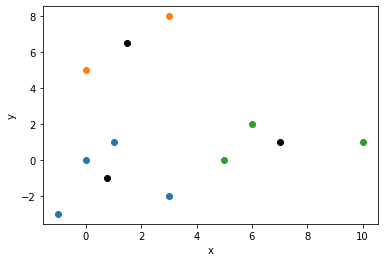

In [18]:
choice = np.zeros(len(data))
dist_2 = np.zeros(len(data)*k).reshape((len(data), k))

for i in range(len(data)):
    dist_2[i][:] =  ((data[i,0] - centr[:,0])**2 + (data[i,1] - centr[:,1])**2)**(1/2)
    choice[i]= np.argmin(dist_2[i])
    
# Теперь у нас есть массив, который хранит для каждой точки из data номер её кластера 


for i in range(k):
    mask = choice[:] == i 
    plt.scatter( data[mask, 0], data[mask, 1] )

plt.scatter(centr[:,0], centr[:,1], c = 'black')
plt.xlabel('x')
plt.ylabel('y')
plt.show()